In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
columns_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [3]:
data = pd.read_csv('magic+gamma+telescope/magic04.data', sep=',', names=columns_name, header=None)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
data.shape

(19020, 11)

In [5]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [7]:
data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [8]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(115)

In [10]:
data['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [11]:
feature_cols = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist'
]

In [12]:
X = data[feature_cols].copy()
y = data['class'].copy()

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled.shape

(19020, 10)

In [15]:
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

In [16]:
outlier_pred = iso.fit_predict(X_scaled)

In [17]:
data['outlier'] = outlier_pred

In [18]:
num_outliers = (outlier_pred == -1).sum()
num_inliers = (outlier_pred == 1).sum()

In [19]:
num_outliers

np.int64(381)

In [20]:
num_inliers

np.int64(18639)

In [21]:
mask_inliers = (outlier_pred == 1)
X_clean = X_scaled[mask_inliers]
y_clean = y[mask_inliers].reset_index(drop=True)
data_clean = data[mask_inliers].reset_index(drop=True)

In [22]:
X_clean.shape

(18639, 10)

In [23]:
Ks = range(2, 10)
inertias = []
sil_scores = []

In [24]:
for k in Ks:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels_k = kmeans.fit_predict(X_clean)

    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_clean, labels_k)
    sil_scores.append(sil)

In [25]:
for k, inertia, sil in zip(Ks, inertias, sil_scores):
    print(f'{k}: {inertia:.3f}, sil: {sil:.3f}')
print()

2: 108963.778, sil: 0.286
3: 93950.034, sil: 0.202
4: 82434.227, sil: 0.211
5: 75954.959, sil: 0.203
6: 70409.232, sil: 0.203
7: 66453.075, sil: 0.167
8: 63070.046, sil: 0.173
9: 60671.826, sil: 0.158



In [26]:
best_k = 2

In [27]:
kmeans_final = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

In [28]:
cluster_labels = kmeans_final.fit_predict(X_clean)

In [29]:
data_clean['cluster'] = cluster_labels

In [30]:
print("Cluster counts:")
print(pd.Series(cluster_labels).value_counts())

Cluster counts:
1    10350
0     8289
Name: count, dtype: int64


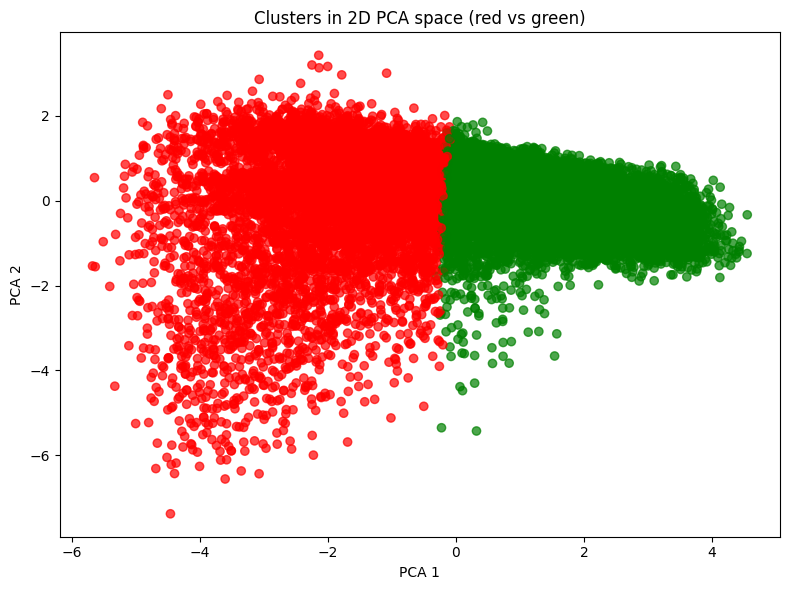

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

color_map = {0: "red", 1: "green"}
colors = [color_map[c] for c in cluster_labels]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=colors,
    alpha=0.7
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters in 2D PCA space (red vs green)")
plt.tight_layout()
plt.show()


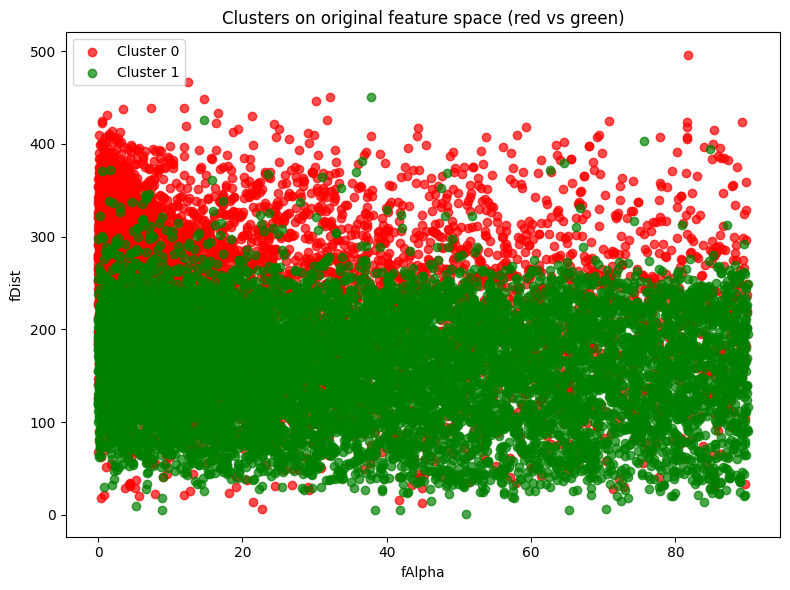

In [32]:
plt.figure(figsize=(8, 6))

color_map = {0: "red", 1: "green"}

for cl, col in color_map.items():
    mask = (data_clean['cluster'] == cl)
    plt.scatter(
        data_clean.loc[mask, 'fAlpha'],
        data_clean.loc[mask, 'fDist'],
        c=col,
        alpha=0.7,
        label=f"Cluster {cl}"
    )

plt.xlabel("fAlpha")
plt.ylabel("fDist")
plt.title("Clusters on original feature space (red vs green)")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
print("Cluster vs class (counts):")
print(pd.crosstab(data_clean['cluster'], y_clean), "\n")

Cluster vs class (counts):
class       g     h
cluster            
0        5523  2766
1        6798  3552 



In [34]:
print("Cluster vs class (row-normalized):")
print(pd.crosstab(data_clean['cluster'], y_clean, normalize='index'))

Cluster vs class (row-normalized):
class           g         h
cluster                    
0        0.666305  0.333695
1        0.656812  0.343188
